In [1]:
from pymongo import MongoClient
import pandas as pd
import re
from src.feature_building import count_keyword_123grams, token_pipeline
from src.data_processing import get_recipe_features, keyword_hierarchy
from nltk.util import ngrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [2]:
client = MongoClient()
db = client['recipes']
coll = db.eda_cookies

In [3]:
regx_cookies = re.compile("cookies", re.IGNORECASE)
regx_choc_chip = re.compile("chocolate.chip.cookies", re.IGNORECASE)
regx_shortbread = re.compile("shortbread", re.IGNORECASE)
regx_snickerdoodle = re.compile("(snickerdoodle|snicker.doodle)", re.IGNORECASE)

In [4]:
curs = coll.find({'label': regx_cookies})
precedence = keyword_hierarchy(curs, 'src/')

In [5]:
curs = coll.find({'label': regx_cookies})
df_cookies = pd.DataFrame([get_recipe_features(doc, precedence) for doc in curs])

In [6]:
df_cookies.shape

(2254, 243)

In [7]:
curs = coll.find({'label': regx_choc_chip})
df_choc_chip = pd.DataFrame([get_recipe_features(doc, precedence) for doc in curs])

In [8]:
df_choc_chip.shape

(234, 135)

In [9]:
df_choc_chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Columns: 135 entries, agav to zucchini
dtypes: float64(134), object(1)
memory usage: 246.9+ KB


In [10]:
df_choc_chip.describe().T.sort_values('count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
salt,217.0,0.003252,0.001983,0.000000,0.001899,0.003005,0.004150,0.011136
butter,201.0,0.144201,0.043192,0.003904,0.120054,0.148938,0.171317,0.259399
bake soda,200.0,0.003239,0.001440,0.001057,0.002285,0.003087,0.003787,0.012252
flour,199.0,0.198583,0.089386,0.003899,0.166538,0.211694,0.235583,0.594979
egg,195.0,0.062469,0.021713,0.020077,0.047318,0.059981,0.073329,0.185538
sugar,189.0,0.115354,0.068679,0.000000,0.076915,0.102913,0.135325,0.542071
brown sugar,181.0,0.130565,0.050177,0.011898,0.097182,0.124089,0.155294,0.303576
vanilla extract,166.0,0.007333,0.006865,0.000623,0.003645,0.005271,0.007994,0.043225
chocol,68.0,0.217452,0.109313,0.000000,0.141382,0.223889,0.285588,0.590456
bake powder,67.0,0.003798,0.002353,0.001236,0.002297,0.003169,0.004311,0.011649


In [11]:
df_choco_chip_fill = df_choc_chip.fillna(0)

In [12]:
curs = coll.find({'label': regx_shortbread})
df_shortbread = pd.DataFrame([get_recipe_features(doc, precedence) for doc in curs])
df_shortbread_fill = df_shortbread.fillna(0)

In [13]:
df_shortbread.describe().T.sort_values('count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
butter,132.0,0.274752,0.107715,0.004805,0.222096,0.291185,0.342964,0.770836
flour,122.0,0.328683,0.130703,0.007373,0.270214,0.358642,0.411525,0.723066
salt,109.0,0.006447,0.023109,0.000302,0.001928,0.003678,0.005787,0.243128
sugar,86.0,0.114710,0.076825,0.000000,0.033121,0.127938,0.170315,0.271929
vanilla extract,54.0,0.005821,0.003734,0.000891,0.003241,0.005206,0.007462,0.023377
powder sugar,29.0,0.112359,0.070619,0.011858,0.045254,0.129400,0.165515,0.278035
confection sugar,28.0,0.108868,0.050547,0.006985,0.092048,0.112777,0.132705,0.200236
bake powder,20.0,0.003875,0.002976,0.000310,0.001862,0.003123,0.004553,0.011075
egg,19.0,0.066571,0.023589,0.028339,0.053220,0.062667,0.080315,0.117137
egg yolk,19.0,0.035753,0.014808,0.019913,0.026155,0.030509,0.039929,0.073326


In [14]:
curs = coll.find({'label': regx_snickerdoodle})
df_snickerdoodle = pd.DataFrame([get_recipe_features(doc, precedence) for doc in curs])
df_snickerdoodle_fill = df_snickerdoodle.fillna(0)
df_snickerdoodle.describe().T.sort_values('count', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
sugar,97.0,0.129016,0.152423,0.004837,0.028631,0.048745,0.210701,0.830675
egg,96.0,0.085919,0.020368,0.034949,0.076428,0.087209,0.096851,0.136241
flour,92.0,0.312279,0.092043,0.008801,0.302785,0.335645,0.356803,0.474851
cinnamon,86.0,0.008382,0.012327,0.000522,0.004527,0.005671,0.008572,0.106084
butter,85.0,0.159940,0.060346,0.044140,0.112118,0.164243,0.214952,0.361791
salt,84.0,0.002276,0.001355,0.000314,0.001456,0.001985,0.002911,0.007184
bake soda,79.0,0.004227,0.001589,0.001119,0.003708,0.004450,0.004704,0.012204
cream tartar,62.0,0.004863,0.002131,0.000365,0.003391,0.005763,0.006135,0.010246
vanilla extract,42.0,0.005785,0.002360,0.002214,0.003944,0.005494,0.007763,0.011491
bake powder,22.0,0.007372,0.002970,0.003073,0.004658,0.007548,0.009107,0.013347


In [15]:
df_snickerdoodle.shape

(100, 71)

In [16]:
def plot_2class_2ingred(ax, df1, df2, ingred1, ingred2, label1, label2):
    ax.scatter(df1[ingred1], df1[ingred2], label=label1, alpha=0.7)
    ax.scatter(df2[ingred1], df2[ingred2], label=label2, alpha=0.7)
    ax.legend()
    ax.set_xlabel("% mass {}".format(ingred1))
    ax.set_ylabel("% mass {}".format(ingred2))

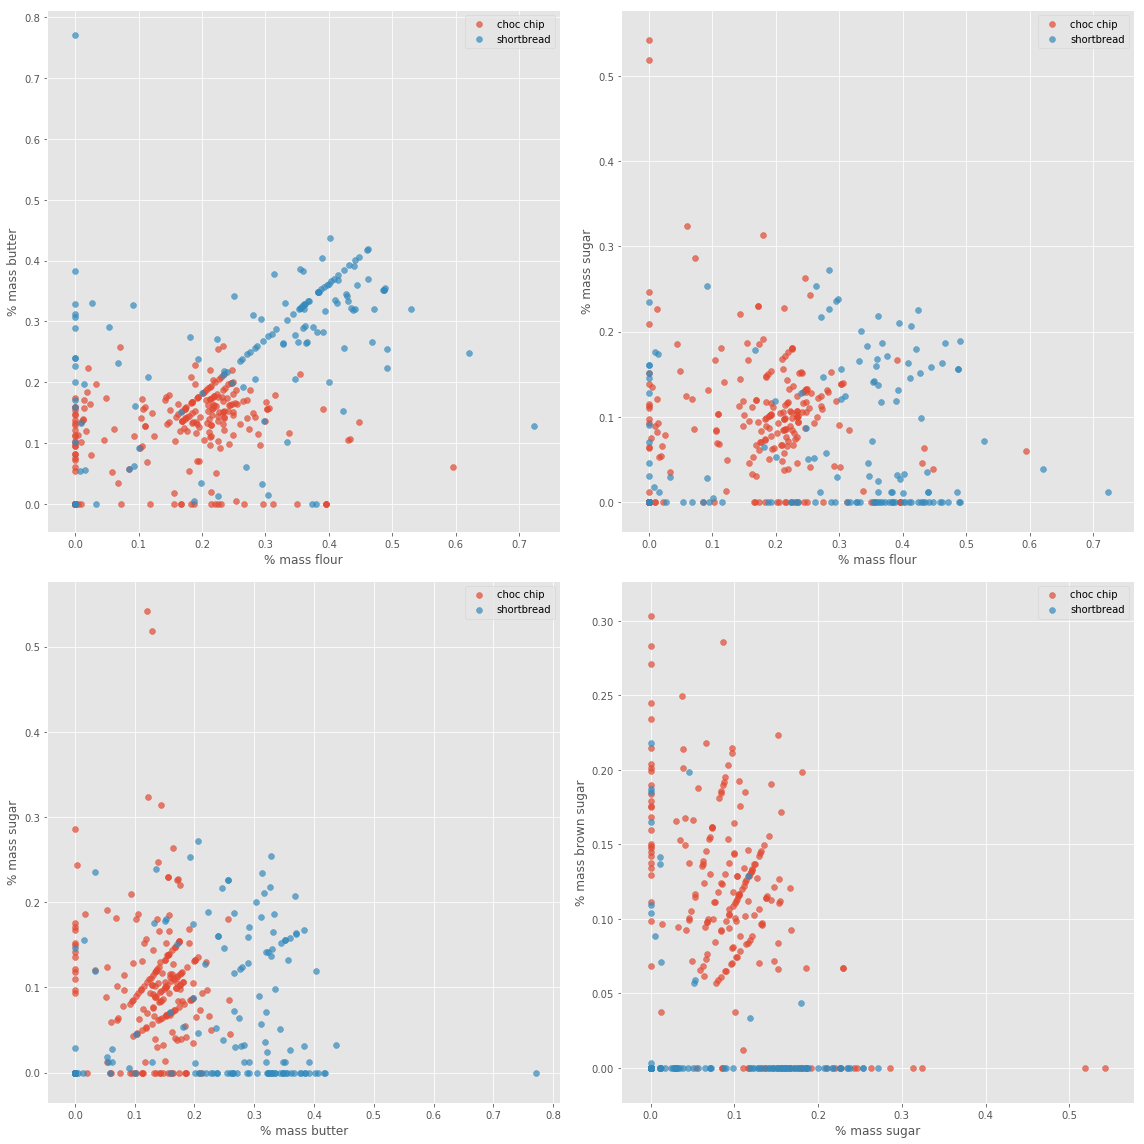

In [17]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2,2, figsize=(16,16))
plot_2class_2ingred(axs[0,0], df_choco_chip_fill, df_shortbread_fill, 'flour', 'butter', 'choc chip', 'shortbread')
plot_2class_2ingred(axs[0,1], df_choco_chip_fill, df_shortbread_fill, 'flour', 'sugar', 'choc chip', 'shortbread')
plot_2class_2ingred(axs[1,0], df_choco_chip_fill, df_shortbread_fill, 'butter', 'sugar', 'choc chip', 'shortbread')
plot_2class_2ingred(axs[1,1], df_choco_chip_fill, df_shortbread_fill, 'sugar', 'brown sugar', 'choc chip', 'shortbread')
plt.tight_layout()

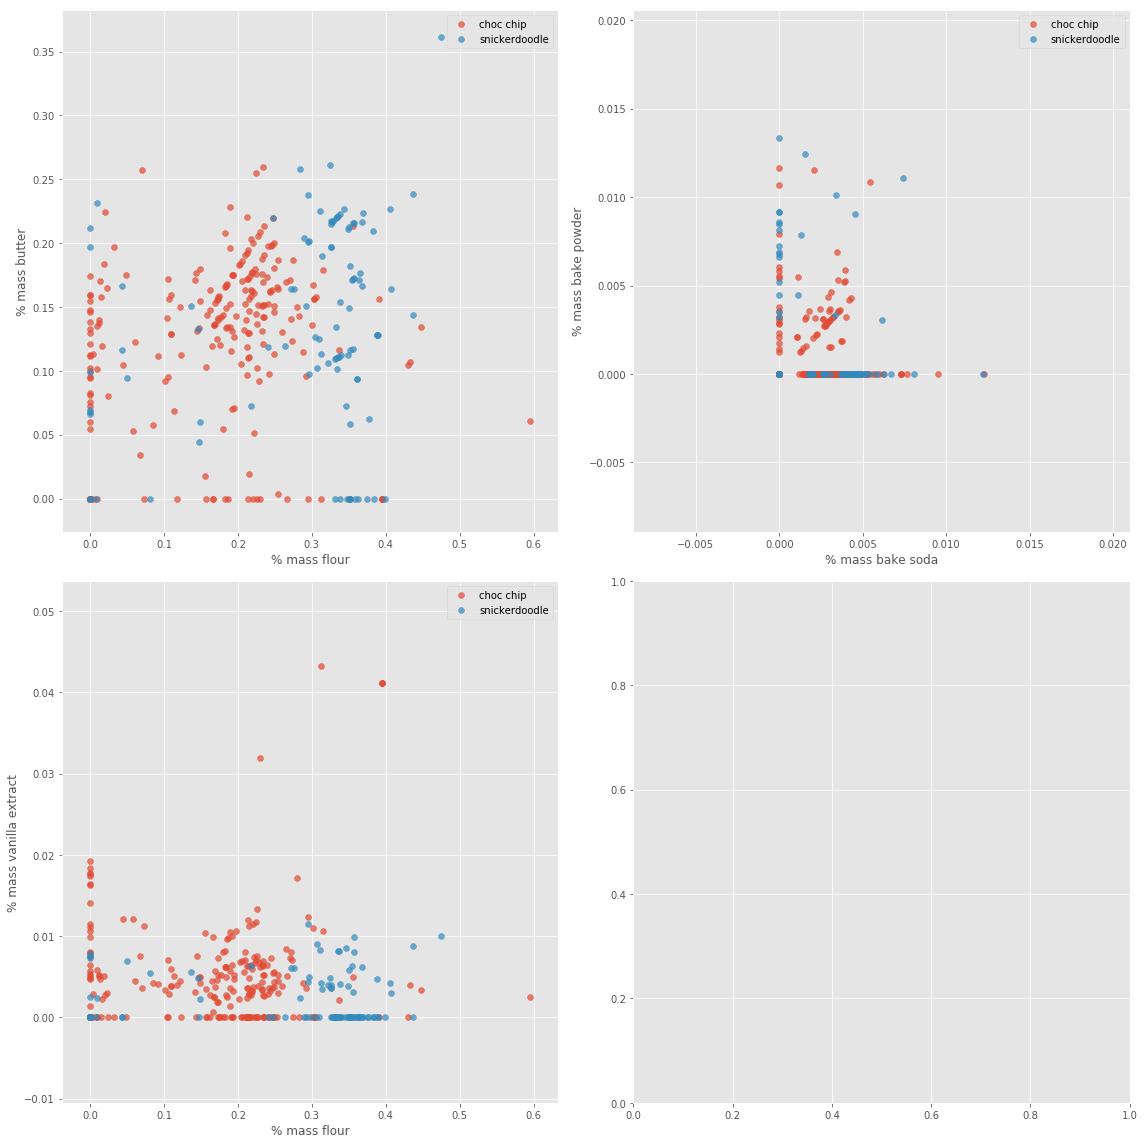

In [18]:
fig, axs = plt.subplots(2,2, figsize=(16,16))
plot_2class_2ingred(axs[0,0], df_choco_chip_fill, df_snickerdoodle_fill, 'flour', 'butter', 'choc chip', 'snickerdoodle')
plot_2class_2ingred(axs[0,1], df_choco_chip_fill, df_snickerdoodle_fill, 'bake soda', 'bake powder', 'choc chip', 'snickerdoodle')
plot_2class_2ingred(axs[1,0], df_choco_chip_fill, df_snickerdoodle_fill, 'flour', 'vanilla extract', 'choc chip', 'snickerdoodle')
# plot_2class_2ingred(axs[1,1], df_choco_chip_fill, df_shortbread_fill, 'sugar', 'brown sugar', 'choc chip', 'shortbread')
plt.tight_layout()

In [19]:
top_10 = list(df_cookies.notnull().sum(axis=0).sort_values(ascending=False).index[1:11])

In [20]:
df_top_10 = df_cookies[top_10].fillna(0)

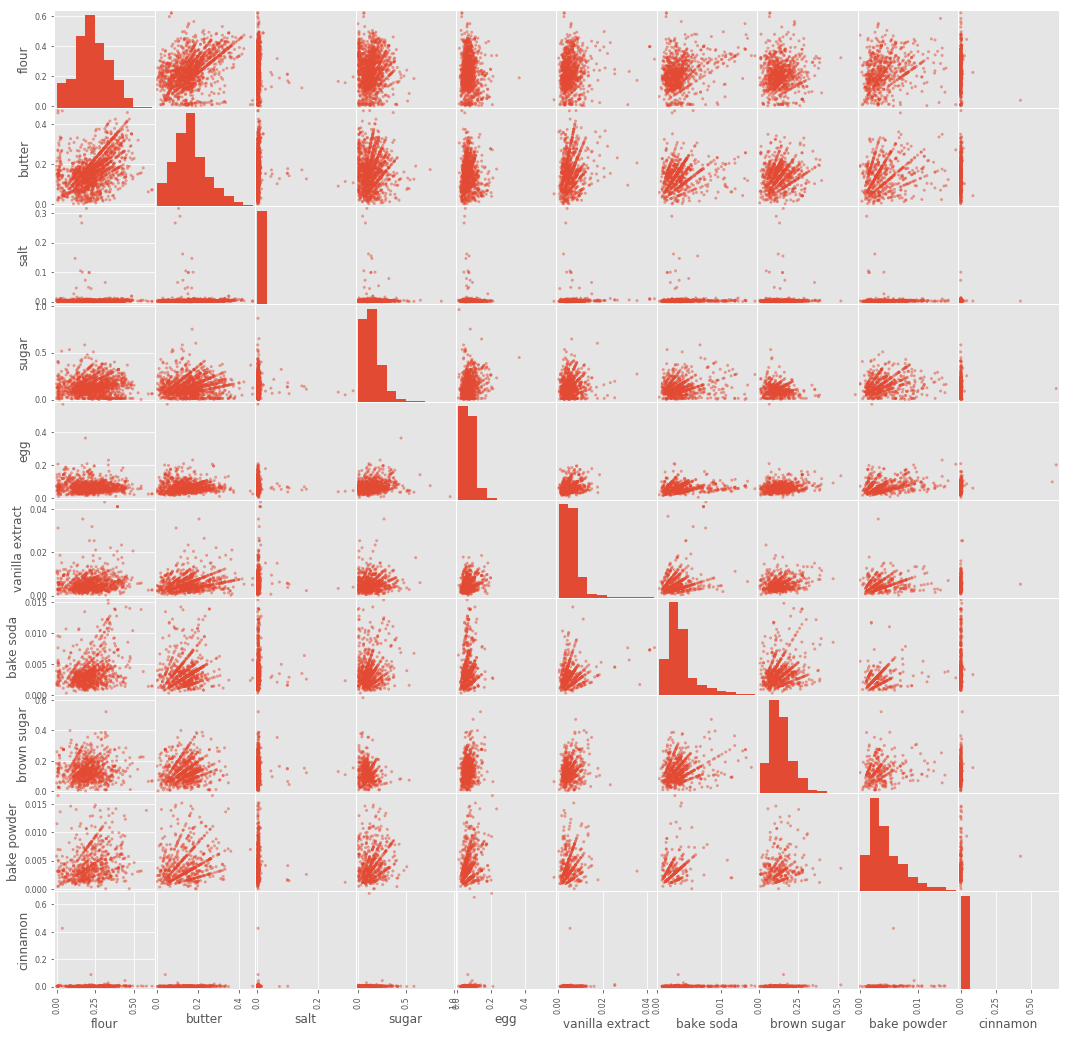

In [21]:
pd.plotting.scatter_matrix(df_cookies[top_10], figsize=(18,18));

In [22]:
scaler = StandardScaler(with_mean=False)

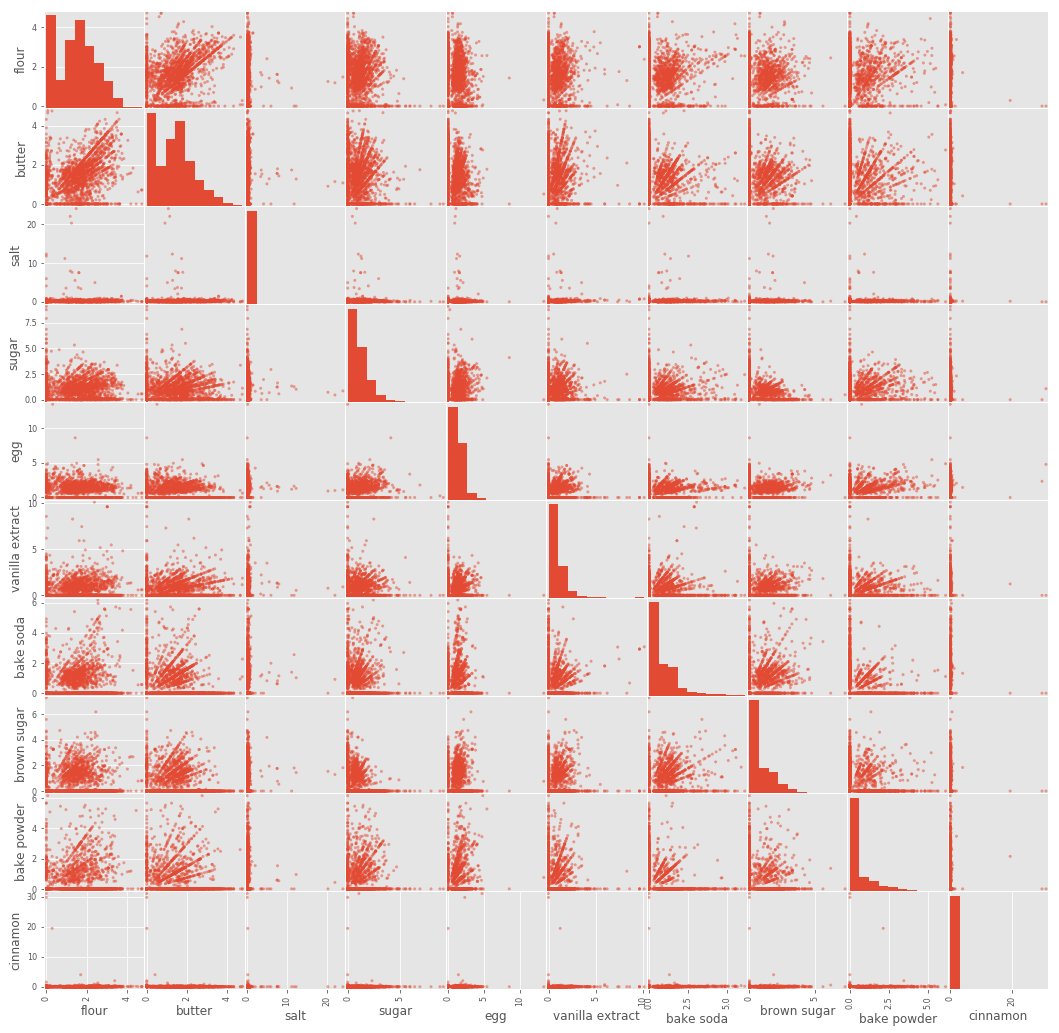

In [23]:
# pd.plotting.scatter_matrix(df_top_10 / df_top_10.std(), figsize=(18,18));

In [24]:
df_cookies.describe().T.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
flour,1887.0,0.233106,0.108676,0.000000,0.160294,0.226250,0.304928,0.620540
butter,1834.0,0.164052,0.083116,0.000000,0.107099,0.156540,0.207972,0.469038
salt,1766.0,0.004078,0.014729,0.000000,0.001587,0.002465,0.003829,0.315380
sugar,1697.0,0.144812,0.103746,0.000000,0.077874,0.126244,0.188508,0.995637
egg,1543.0,0.068834,0.033751,0.005601,0.048321,0.062681,0.080609,0.568599
vanilla extract,1203.0,0.005811,0.004288,0.000181,0.003317,0.004848,0.007050,0.043225
bake soda,1125.0,0.003720,0.002345,0.000290,0.002250,0.003190,0.004184,0.015365
brown sugar,1014.0,0.138619,0.072834,0.003005,0.092239,0.127797,0.174248,0.613725
bake powder,764.0,0.004410,0.002899,0.000000,0.002332,0.003571,0.005695,0.016521
cinnamon,523.0,0.006621,0.045202,0.000000,0.001549,0.002395,0.003615,0.680751


In [25]:
common_ingred = df_cookies.columns[df_cookies.notnull().sum() >= 20]

In [26]:
'label' in common_ingred

True

In [27]:
df_common = df_cookies[common_ingred].drop('label', axis=1).fillna(0)
df_scaled = df_common / df_common.std()

In [28]:
dist_mat = squareform(pdist(df_scaled, metric='cosine'))

In [29]:
dist_mat.shape

(2254, 2254)

In [30]:
labels = df_cookies['label']

In [31]:
def walk_through_recipes(dist_mat, steps, labels, start=None):
    currernt = start
    visited = set()
    if not start:
        current = np.random.randint(0, dist_mat.shape[0])
    for _ in xrange(steps):
        print labels[current] + ' ===>'
        visited.add(current)
        nearest = np.argsort(dist_mat[current])
        for neighbor in nearest:
            if neighbor not in visited:
                current = neighbor
                break

In [32]:
walk_through_recipes(dist_mat, 5, labels)

COOKIES WITH A KICK: TRIPLE CHOCOLATE PECAN BITES ===>
Mayan Chocolate Cookies ===>
Chocolate-Cayenne Cocktail Cookies ===>
Smoked Cheese Cocktail Cookies ===>
Cinnamon-Spiced Hot Chocolate Cookies Recipe ===>


In [33]:
walk_through_recipes(dist_mat, 5, labels)

Cake Mix Chocolate Crinkle Cookies ===>
Brownie Crinkle Cookies ===>
Cake Mix Cookies ===>
Chocolate Chewy Brownie Cookies ===>
Brownie Swirled Peanut Butter Oreo Cookies ===>


In [34]:
walk_through_recipes(dist_mat, 5, labels)

Candied Ginger Cookies with Dark Chocolate Ganache Recipe ===>
Chocolate Dipped Shortbread Cookies ===>
Chocolate chip cookies ===>
Salted chocolate chip cookies ===>
Double Chocolate Icebox Cookies with Aji and Chipotle ===>


In [35]:
walk_through_recipes(dist_mat, 10, labels)

Candied Ginger Cookies with Dark Chocolate Ganache Recipe ===>
Chocolate Dipped Shortbread Cookies ===>
Chocolate chip cookies ===>
Salted chocolate chip cookies ===>
Double Chocolate Icebox Cookies with Aji and Chipotle ===>
Chewy Molasses Chocolate Chip Cookies ===>
Chocolate Chip Granola Cookies ===>
Chocolate chip cookies ===>
Salted Dark Chocolate Toffee Cookies ===>
Salty Sesame and Dark Chocolate Chip Cookies ===>


In [40]:
df_top_10.mean().index

Index([u'flour', u'butter', u'salt', u'sugar', u'egg', u'vanilla extract',
       u'bake soda', u'brown sugar', u'bake powder', u'cinnamon'],
      dtype='object')

In [42]:
coll.find_one()

{u'_id': ObjectId('59a634b0e970dc0c0b022a1d'),
 u'calories': 7171.664670786857,
 u'cautions': [],
 u'dietLabels': [],
 u'digest': [{u'daily': 491.96225123830936,
   u'hasRDI': True,
   u'label': u'Fat',
   u'schemaOrgTag': u'fatContent',
   u'sub': [{u'daily': 969.3006355402233,
     u'hasRDI': True,
     u'label': u'Saturated',
     u'schemaOrgTag': u'saturatedFatContent',
     u'tag': u'FASAT',
     u'total': 193.86012710804465,
     u'unit': u'g'},
    {u'daily': 0.0,
     u'hasRDI': False,
     u'label': u'Trans',
     u'schemaOrgTag': u'transFatContent',
     u'tag': u'FATRN',
     u'total': 9.330973942871093,
     u'unit': u'g'},
    {u'daily': 0.0,
     u'hasRDI': False,
     u'label': u'Monounsaturated',
     u'schemaOrgTag': None,
     u'tag': u'FAMS',
     u'total': 88.81004426345349,
     u'unit': u'g'},
    {u'daily': 0.0,
     u'hasRDI': False,
     u'label': u'Polyunsaturated',
     u'schemaOrgTag': None,
     u'tag': u'FAPU',
     u'total': 15.186441522727014,
     u'uni

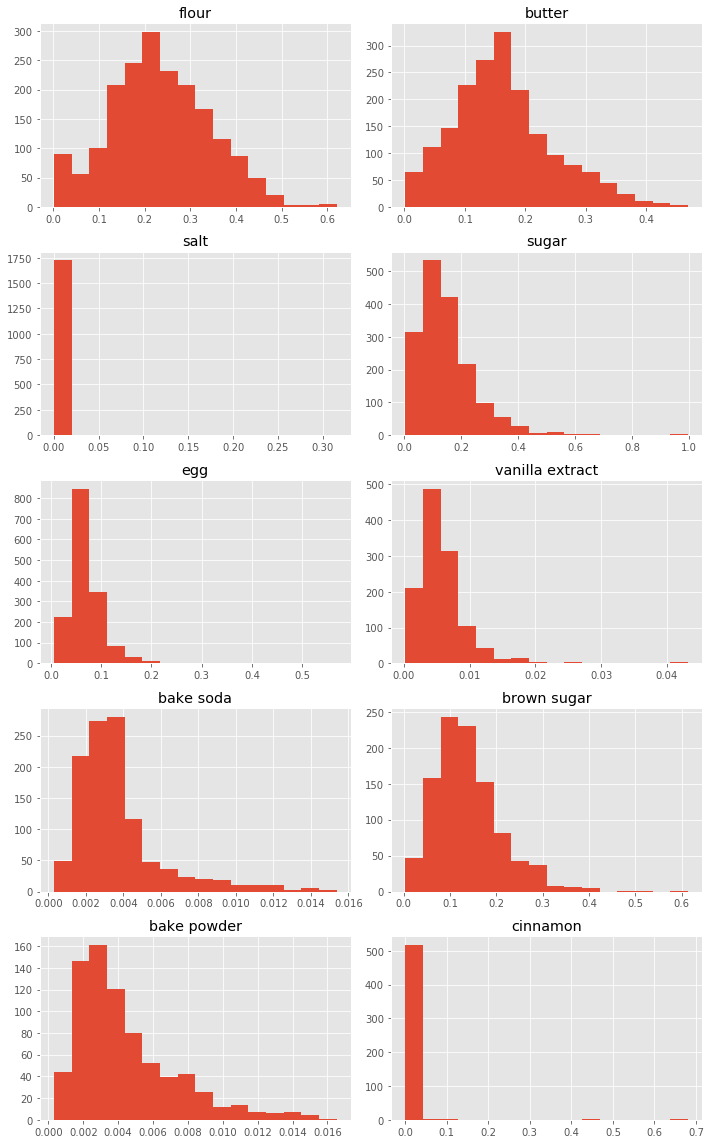

In [60]:
fig, axs = plt.subplots(5,2, figsize=(10,16))
for (name, ser), ax in zip(df_top_10.iteritems(), axs.flatten()):
    non0 = ser[ser > 0]
    ax.hist(non0, bins=16)
    ax.set_title(name)
plt.tight_layout()

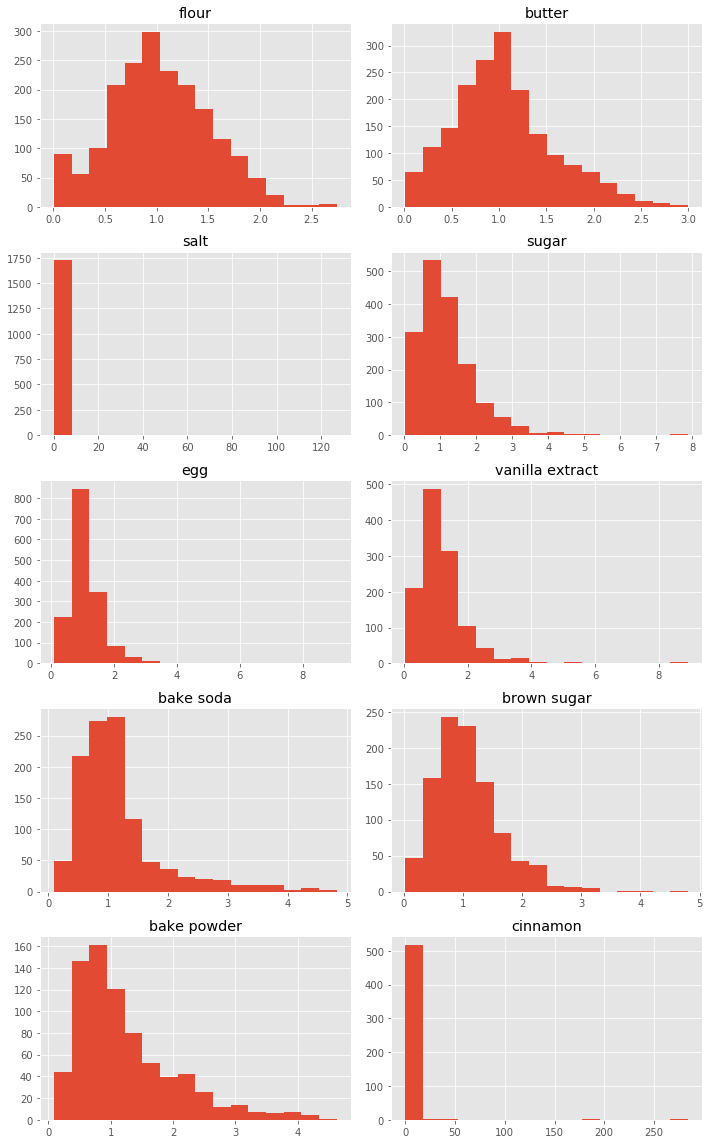

In [62]:
fig, axs = plt.subplots(5,2, figsize=(10,16))
for (name, ser), ax in zip(df_top_10.iteritems(), axs.flatten()):
    non0 = ser[ser > 0]
    scaled = non0 / non0.median()
    ax.hist(scaled, bins=16)
    ax.set_title(name)
plt.tight_layout()

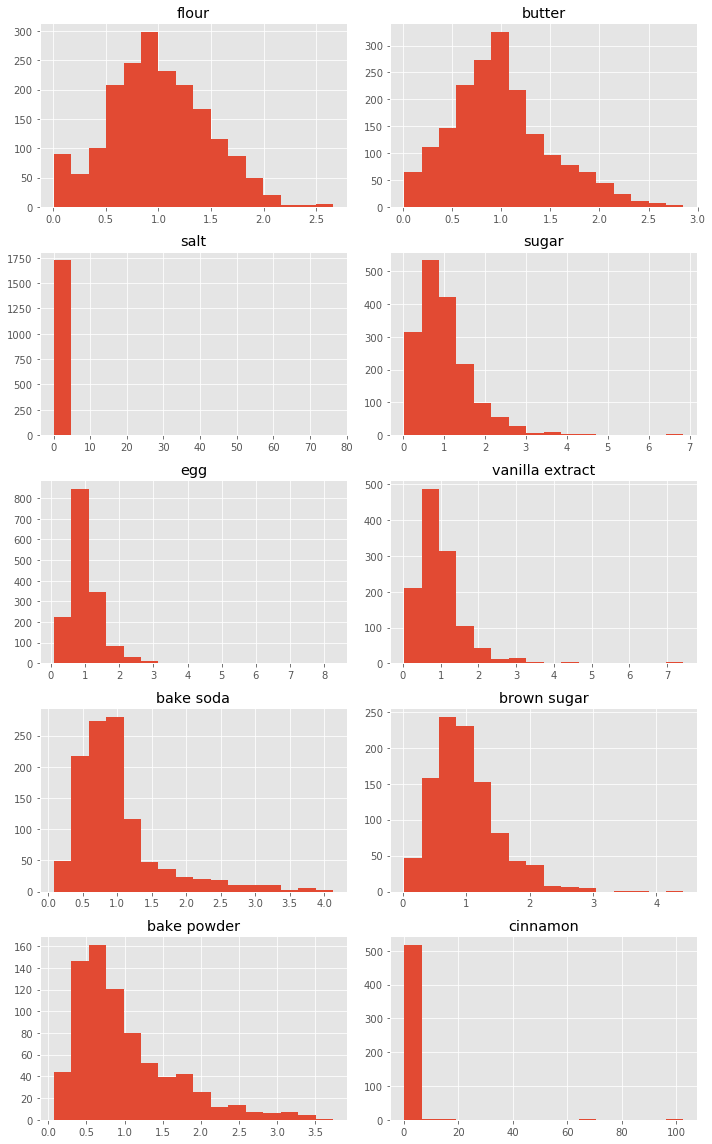

In [63]:
fig, axs = plt.subplots(5,2, figsize=(10,16))
for (name, ser), ax in zip(df_top_10.iteritems(), axs.flatten()):
    non0 = ser[ser > 0]
    scaled = non0 / non0.mean()
    ax.hist(scaled, bins=16)
    ax.set_title(name)
plt.tight_layout()